In [25]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# GRID 확률 변환 작업

In [19]:
grid_list={1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25}

In [20]:
X=[]
for i in grid_list:
    GRID=pd.read_csv('./그리드%d.csv'%i,header=0)
    X.extend(GRID.단속건수.tolist())

(array([1.102499e+06, 1.039300e+04, 1.785000e+03, 5.730000e+02,
        1.990000e+02, 8.300000e+01, 4.700000e+01, 2.200000e+01,
        1.100000e+01, 3.000000e+00]),
 array([ 0. ,  7.3, 14.6, 21.9, 29.2, 36.5, 43.8, 51.1, 58.4, 65.7, 73. ]),
 <a list of 10 Patch objects>)

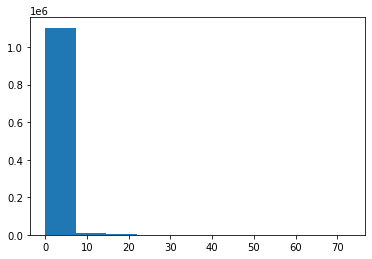

In [21]:
plt.hist(X)

In [22]:
print(np.array(X).mean()) # 0.56
print(np.array(X).max()) # 73

0.5695997275045602
73


# Grid 별 각각의 Model을 학습
## 이 때 Grid에서 너무 sparse 한 경우 Rule Based로 0으로 
## Sparse 기준

In [28]:
for i in grid_list:
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    print((grid.단속건수!=0).sum())
    print((grid.단속건수==0).sum())  
    print('\n')

grid 1
9969
38536


grid 2
8437
40068


grid 4
16876
31629


grid 5
16657
31848


grid 6
2
48503


grid 7
12103
36402


grid 8
21145
27360


grid 9
18
48487


grid 10
23417
25088


grid 11
10945
37560


grid 12
843
47662


grid 13
1922
46583


grid 14
17716
30789


grid 15
1
48504


grid 16
12426
36079


grid 17
6391
42114


grid 18
4
48501


grid 20
14810
33695


grid 21
1
48504


grid 22
79
48426


grid 23
14247
34258


grid 24
6553
41952


grid 25
26740
21765




## 제외시킬 grid
6, 9, 12, 15, 18, 21, 22 

# XG Boost

In [29]:
for i in grid_list-set([6,9,12,15,18,21,22]):
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    train_data=grid[grid.index<='2020-06-30']
    test_data=grid[grid.index>'2020-06-30']
    y=(train_data['단속건수']!=0).astype(int)
    X=train_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    x_samp,y_samp=RandomOverSampler().fit_sample(X,y)
    xgb=XGBClassifier()
    xgb.fit(x_samp,y_samp)
    print("Test data")
    y_test=(test_data['단속건수']!=0).astype(int)
    X_test=test_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    print(classification_report(y_test,xgb.predict(X_test)))
    print(confusion_matrix(y_test,xgb.predict(X_test),labels=[0,1]))

grid 1
Test data
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       288
           1       0.22      0.67      0.33        49

    accuracy                           0.60       337
   macro avg       0.56      0.63      0.52       337
weighted avg       0.81      0.60      0.66       337

[[168 120]
 [ 16  33]]
grid 2
Test data
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       314
           1       0.08      0.48      0.14        23

    accuracy                           0.61       337
   macro avg       0.51      0.55      0.45       337
weighted avg       0.88      0.61      0.71       337

[[195 119]
 [ 12  11]]
grid 4
Test data
              precision    recall  f1-score   support

           0       0.89      0.60      0.71       247
           1       0.42      0.79      0.54        90

    accuracy                           0.65       337
   macro avg       0.65      0.

In [30]:
for i in grid_list-set([6,9,12,15,18,21,22]):
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    train_data=grid[grid.index<='2020-06-30']
    test_data=grid[grid.index>'2020-06-30']
    y=(train_data['단속건수']!=0).astype(int)
    X=train_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    x_samp,y_samp=RandomUnderSampler().fit_sample(X,y)
    xgb=XGBClassifier()
    xgb.fit(x_samp,y_samp)
    print("Test data")
    y_test=(test_data['단속건수']!=0).astype(int)
    X_test=test_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    print(classification_report(y_test,xgb.predict(X_test)))
    print(confusion_matrix(y_test,xgb.predict(X_test),labels=[0,1]))

grid 1
Test data
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       288
           1       0.20      0.69      0.32        49

    accuracy                           0.56       337
   macro avg       0.56      0.62      0.50       337
weighted avg       0.81      0.56      0.63       337

[[156 132]
 [ 15  34]]
grid 2
Test data
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       314
           1       0.09      0.52      0.15        23

    accuracy                           0.58       337
   macro avg       0.51      0.56      0.44       337
weighted avg       0.89      0.58      0.69       337

[[185 129]
 [ 11  12]]
grid 4
Test data
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       247
           1       0.43      0.82      0.56        90

    accuracy                           0.66       337
   macro avg       0.66      0.

# Randomforest

# Oversampling

In [33]:
for i in grid_list-set([6,9,12,15,18,21,22]):
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    train_data=grid[grid.index<='2020-06-30']
    test_data=grid[grid.index>'2020-06-30']
    y=(train_data['단속건수']!=0).astype(int)
    X=train_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    x_samp,y_samp=RandomOverSampler().fit_sample(X,y)
    rf=RandomForestClassifier()
    rf.fit(x_samp,y_samp)
    print("Test data")
    y_test=(test_data['단속건수']!=0).astype(int)
    X_test=test_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    print(classification_report(y_test,rf.predict(X_test)))
    print(confusion_matrix(y_test,rf.predict(X_test),labels=[0,1]))

grid 1
Test data
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       288
           1       0.24      0.41      0.31        49

    accuracy                           0.73       337
   macro avg       0.57      0.60      0.57       337
weighted avg       0.79      0.73      0.76       337

[[226  62]
 [ 29  20]]
grid 2
Test data
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       314
           1       0.13      0.13      0.13        23

    accuracy                           0.88       337
   macro avg       0.53      0.53      0.53       337
weighted avg       0.88      0.88      0.88       337

[[294  20]
 [ 20   3]]
grid 4
Test data
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       247
           1       0.39      0.50      0.44        90

    accuracy                           0.66       337
   macro avg       0.60      0.

# Undersampling

In [34]:
for i in grid_list-set([6,9,12,15,18,21,22]):
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    train_data=grid[grid.index<='2020-06-30']
    test_data=grid[grid.index>'2020-06-30']
    y=(train_data['단속건수']!=0).astype(int)
    X=train_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    x_samp,y_samp=RandomUnderSampler().fit_sample(X,y)
    rf=RandomForestClassifier()
    rf.fit(x_samp,y_samp)
    print("Test data")
    y_test=(test_data['단속건수']!=0).astype(int)
    X_test=test_data[['month', 'days', 'hour', '요일', '시간대', 'holiday']]
    print(classification_report(y_test,rf.predict(X_test)))
    print(confusion_matrix(y_test,rf.predict(X_test),labels=[0,1]))

grid 1
Test data
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       288
           1       0.20      0.63      0.30        49

    accuracy                           0.58       337
   macro avg       0.55      0.60      0.50       337
weighted avg       0.80      0.58      0.64       337

[[164 124]
 [ 18  31]]
grid 2
Test data
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       314
           1       0.11      0.61      0.19        23

    accuracy                           0.65       337
   macro avg       0.54      0.63      0.49       337
weighted avg       0.90      0.65      0.74       337

[[206 108]
 [  9  14]]
grid 4
Test data
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       247
           1       0.39      0.69      0.50        90

    accuracy                           0.63       337
   macro avg       0.62      0.

# Total data로 학습

In [64]:
total_grid=pd.read_csv('./그리드1.csv',header=0,index_col=0)
for i in grid_list-set([1,6,9,12,15,18,21,22]):
    print('grid %d'%i)
    grid=pd.read_csv('./그리드%d.csv'%i,header=0,index_col=0)
    total_grid=pd.concat([X,grid],axis=0)

grid 2
grid 4
grid 5
grid 7
grid 8
grid 10
grid 11
grid 13
grid 14
grid 16
grid 17
grid 20
grid 23
grid 24
grid 25


# TRAIN TEST SPLIT

In [ ]:
## Grid 1만 일단 진행해보자
## TEST는 2020년 7월 데이터만을 기준으로 진행하자

# XGBoost

# Oversampling

In [83]:
train_data=total_grid[(total_grid.index<='2020-06-30')]
test_data=total_grid[(total_grid.index>'2020-06-30')]
y=(train_data['단속건수']!=0).astype(int)
X=train_data[['month', 'days', 'grid_num', 'hour', '요일', '시간대', 'holiday']]
x_samp,y_samp=RandomOverSampler().fit_sample(X,y)
xgb=XGBClassifier()
xgb.fit(x_samp,y_samp)
print("Train data")
print(classification_report(y_samp,xgb.predict(x_samp)))
print(confusion_matrix(y_samp,xgb.predict(x_samp),labels=[0,1]))
print("Test data")
y_test=(test_data['단속건수']!=0).astype(int)
X_test=test_data[['month', 'days', 'grid_num', 'hour', '요일', '시간대', 'holiday']]
print(classification_report(y_test,xgb.predict(X_test)))
print(confusion_matrix(y_test,xgb.predict(X_test),labels=[0,1]))

Train data
              precision    recall  f1-score   support

           0       0.80      0.77      0.78    573145
           1       0.78      0.81      0.79    573145

    accuracy                           0.79   1146290
   macro avg       0.79      0.79      0.79   1146290
weighted avg       0.79      0.79      0.79   1146290

[[439597 133548]
 [110653 462492]]
Test data
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      4346
           1       0.43      0.80      0.56      1383

    accuracy                           0.69      5729
   macro avg       0.67      0.73      0.66      5729
weighted avg       0.79      0.69      0.72      5729

[[2871 1475]
 [ 279 1104]]


# UNDER SAMPLING for TRAIN

In [84]:
train_data=total_grid[(total_grid.index<='2020-06-30')]
test_data=total_grid[(total_grid.index>'2020-06-30')]
y=(train_data['단속건수']!=0).astype(int)
X=train_data[['month', 'days', 'grid_num', 'hour', '요일', '시간대', 'holiday']]
x_samp,y_samp=RandomUnderSampler().fit_sample(X,y)
xgb=XGBClassifier()
xgb.fit(x_samp,y_samp)
print("Train data")
print(classification_report(y_samp,xgb.predict(x_samp)))
print(confusion_matrix(y_samp,xgb.predict(x_samp),labels=[0,1]))
print("Test data")
y_test=(test_data['단속건수']!=0).astype(int)
X_test=test_data[['month', 'days', 'grid_num', 'hour', '요일', '시간대', 'holiday']]
print(classification_report(y_test,xgb.predict(X_test)))
print(confusion_matrix(y_test,xgb.predict(X_test),labels=[0,1]))

Train data
              precision    recall  f1-score   support

           0       0.80      0.77      0.78    245711
           1       0.78      0.81      0.79    245711

    accuracy                           0.79    491422
   macro avg       0.79      0.79      0.79    491422
weighted avg       0.79      0.79      0.79    491422

[[188869  56842]
 [ 47735 197976]]
Test data
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      4346
           1       0.42      0.80      0.55      1383

    accuracy                           0.69      5729
   macro avg       0.67      0.73      0.66      5729
weighted avg       0.79      0.69      0.71      5729

[[2828 1518]
 [ 275 1108]]


# Total data 불러오기

In [163]:
total_data=gpd.GeoDataFrame(total_data,geometry=gpd.points_from_xy(total_data.y,total_data.x))

In [164]:
total_data.head()

,단속일시,단속동,단속장소,단속조_index,place,x,y,geometry,grid_num,비오톱유형,date
시군구명,,,,,,,,,,,
중구,2015-01-01 00:13,신당동,다산로 128-9,1,신당동 다산로 128-9,37.551987,127.007976,POINT (127.00798 37.55199),2,0,2015-01-01 00:13:00
중구,2015-01-01 00:14,신당동,다산로 128-9,1,신당동 다산로 128-9,37.551987,127.007976,POINT (127.00798 37.55199),2,0,2015-01-01 00:14:00
중구,2015-01-01 00:15,신당동,다산로 128-9,1,신당동 다산로 128-9,37.551987,127.007976,POINT (127.00798 37.55199),2,0,2015-01-01 00:15:00
중구,2015-03-16 21:08,신당동,다산로 128-9주변,1,신당동 다산로 128-9,37.551987,127.007976,POINT (127.00798 37.55199),2,0,2015-03-16 21:08:00
중구,2015-03-16 21:08,신당동,다산로 128-9주변,1,신당동 다산로 128-9,37.551987,127.007976,POINT (127.00798 37.55199),2,0,2015-03-16 21:08:00


In [165]:
# jungu_grid data
jungu_grid=gpd.read_file('G:/지니웍스 프로젝트/데이터/지도 데이터/서울시/중구/jung_gu_grid_009.shp')
jungu_grid['grid_num']=jungu_grid.index+1
jungu_grid['centroid']=jungu_grid.centroid

<ipython-input-165-f78c854280b9>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jungu_grid['centroid']=jungu_grid.centroid


In [166]:
jungu_grid.head()

,id,left,top,right,bottom,geometry,grid_num,centroid
0,22.0,127.006559,37.563023,127.015559,37.554023,"POLYGON ((127.00656 37.56302, 127.01556 37.563...",1,POINT (127.01106 37.55852)
1,23.0,127.006559,37.554023,127.015559,37.545023,"POLYGON ((127.00656 37.55402, 127.01556 37.554...",2,POINT (127.01106 37.54952)
2,20.0,126.997559,37.545023,127.006559,37.536023,"POLYGON ((126.99756 37.54502, 127.00656 37.545...",3,POINT (127.00206 37.54052)
3,21.0,127.006559,37.572023,127.015559,37.563023,"POLYGON ((127.00656 37.57202, 127.01556 37.572...",4,POINT (127.01106 37.56752)
4,10.0,126.979559,37.563023,126.988559,37.554023,"POLYGON ((126.97956 37.56302, 126.98856 37.563...",5,POINT (126.98406 37.55852)


In [174]:
jungu_grid.centroid.distance(total_data.geometry[0])

<ipython-input-174-a021fb27a1a5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jungu_grid.centroid.distance(total_data.geometry[0])
<ipython-input-174-a021fb27a1a5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jungu_grid.centroid.distance(total_data.geometry[0])


0     0.007227
1     0.003947
2     0.012901
3     0.015839
4     0.024794
5     0.024043
6     0.028520
7     0.016286
8     0.015119
9     0.021538
10    0.042423
11    0.041989
12    0.044703
13    0.033559
14    0.033009
15    0.036399
16    0.013738
17    0.012332
18    0.011871
19    0.019682
20    0.022073
21    0.026189
22    0.008816
23    0.006409
24    0.016625
dtype: float64